In [9]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn


sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

# 1) Load data

In [10]:
import pandas as pd

# Load data
hour_df = pd.read_csv('DATA/Bike-Sharing-Dataset/hour.csv')
print(hour_df.info())
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2) Pre-process data
## 2.1) Standarize column names

In [11]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'}, inplace=True)

## 2.2) Typecast Attributes

In [12]:
# date time variable 
hour_df.datetime = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df.season = hour_df.season.astype('category')
hour_df.is_holiday = hour_df.is_holiday.astype('category')
hour_df.weekday = hour_df.weekday.astype('category')
hour_df.weather_condition = hour_df.weather_condition.astype('category')
hour_df.is_workingday = hour_df.is_workingday.astype('category')
hour_df.month = hour_df.month.astype('category')
hour_df.year = hour_df.year.astype('category')
hour_df.hour = hour_df.hour.astype('category')
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2.3) Make dummy variables for selected categorical variables

In [13]:
features_for_dummies = ['season','is_holiday','is_workingday','weather_condition']
hour_df_with_dummies = pd.get_dummies(hour_df,columns=features_for_dummies, prefix=features_for_dummies)
print(hour_df_with_dummies.info())
hour_df_with_dummies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
rec_id                 17379 non-null int64
datetime               17379 non-null datetime64[ns]
year                   17379 non-null category
month                  17379 non-null category
hour                   17379 non-null category
weekday                17379 non-null category
temp                   17379 non-null float64
atemp                  17379 non-null float64
humidity               17379 non-null float64
windspeed              17379 non-null float64
casual                 17379 non-null int64
registered             17379 non-null int64
total_count            17379 non-null int64
season_1               17379 non-null uint8
season_2               17379 non-null uint8
season_3               17379 non-null uint8
season_4               17379 non-null uint8
is_holiday_0           17379 non-null uint8
is_holiday_1           17379 non-null uint8
is_workingday_0        173

,rec_id,datetime,year,month,hour,weekday,temp,atemp,humidity,windspeed,...,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,1,2011-01-01,0,1,0,6,0.24,0.2879,0.81,0.0,...,0,0,1,0,1,0,1,0,0,0
1,2,2011-01-01,0,1,1,6,0.22,0.2727,0.80,0.0,...,0,0,1,0,1,0,1,0,0,0
2,3,2011-01-01,0,1,2,6,0.22,0.2727,0.80,0.0,...,0,0,1,0,1,0,1,0,0,0
3,4,2011-01-01,0,1,3,6,0.24,0.2879,0.75,0.0,...,0,0,1,0,1,0,1,0,0,0
4,5,2011-01-01,0,1,4,6,0.24,0.2879,0.75,0.0,...,0,0,1,0,1,0,1,0,0,0


# 3) Make Model

# 1) Load data

In [14]:
import pandas as pd

# Load data
hour_df = pd.read_csv('DATA/Bike-Sharing-Dataset/hour.csv')
print(hour_df.info())
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2) Pre-process data
## 2.1) Standarize column names

In [15]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'}, inplace=True)

## 2.2) Typecast Attributes

In [16]:
# date time variable 
hour_df.datetime = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df.season = hour_df.season.astype('category')
hour_df.is_holiday = hour_df.is_holiday.astype('category')
hour_df.weekday = hour_df.weekday.astype('category')
hour_df.weather_condition = hour_df.weather_condition.astype('category')
hour_df.is_workingday = hour_df.is_workingday.astype('category')
hour_df.month = hour_df.month.astype('category')
hour_df.year = hour_df.year.astype('category')
hour_df.hour = hour_df.hour.astype('category')
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2.3) Make dummy variables for selected categorical variables

In [17]:
features_for_dummies = ['season','is_holiday','is_workingday','weather_condition']
hour_df_with_dummies = pd.get_dummies(hour_df,columns=features_for_dummies, prefix=features_for_dummies)
print(hour_df_with_dummies.info())
hour_df_with_dummies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
rec_id                 17379 non-null int64
datetime               17379 non-null datetime64[ns]
year                   17379 non-null category
month                  17379 non-null category
hour                   17379 non-null category
weekday                17379 non-null category
temp                   17379 non-null float64
atemp                  17379 non-null float64
humidity               17379 non-null float64
windspeed              17379 non-null float64
casual                 17379 non-null int64
registered             17379 non-null int64
total_count            17379 non-null int64
season_1               17379 non-null uint8
season_2               17379 non-null uint8
season_3               17379 non-null uint8
season_4               17379 non-null uint8
is_holiday_0           17379 non-null uint8
is_holiday_1           17379 non-null uint8
is_workingday_0        173

,rec_id,datetime,year,month,hour,weekday,temp,atemp,humidity,windspeed,...,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,1,2011-01-01,0,1,0,6,0.24,0.2879,0.81,0.0,...,0,0,1,0,1,0,1,0,0,0
1,2,2011-01-01,0,1,1,6,0.22,0.2727,0.80,0.0,...,0,0,1,0,1,0,1,0,0,0
2,3,2011-01-01,0,1,2,6,0.22,0.2727,0.80,0.0,...,0,0,1,0,1,0,1,0,0,0
3,4,2011-01-01,0,1,3,6,0.24,0.2879,0.75,0.0,...,0,0,1,0,1,0,1,0,0,0
4,5,2011-01-01,0,1,4,6,0.24,0.2879,0.75,0.0,...,0,0,1,0,1,0,1,0,0,0


# 3) Make Model

## 3.1) Set up all independent and dependent variables

In [18]:
# crate a list of names of the independent variables
x_column_name = list(hour_df_with_dummies.columns)
x_column_name.remove('rec_id')
x_column_name.remove('datetime')
x_column_name.remove('atemp')
x_column_name.remove('casual')
x_column_name.remove('registered')
x_column_name.remove('total_count')
x_column_name

['year',
 'month',
 'hour',
 'weekday',
 'temp',
 'humidity',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'is_holiday_0',
 'is_holiday_1',
 'is_workingday_0',
 'is_workingday_1',
 'weather_condition_1',
 'weather_condition_2',
 'weather_condition_3',
 'weather_condition_4']

In [19]:
# all independent and dependent variables
all_X = hour_df_with_dummies[x_column_name]
all_y = hour_df_with_dummies.total_count


## 3.2) Make training and testing data

In [20]:
from sklearn.model_selection import  train_test_split
X, X_test, y, y_test = train_test_split(all_X, all_y,test_size=0.33, random_state=42)

## 3.3) Get usage of the DecisionTreeRegressor model

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)
model.fit(X,y)
model.score(X,y)

0.5645919317952333

## 3.4) Visualize the tree

In [22]:
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(model,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("bikeshare.pdf")



True

## 3.5) Cross Validation: Best Model Details

In [23]:
# Grid Search With Cross Validation
param_grid = {"criterion": ["mse", "friedman_mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [24]:
'''
from sklearn.model_selection import GridSearchCV

# prepare a GridSearchCV object 
grid_cv_dtr = GridSearchCV(model, param_grid, cv=5)

# fit the training dataset to the object
grid_cv_dtr.fit(X,y)

'''

'\nfrom sklearn.model_selection import GridSearchCV\n\n# prepare a GridSearchCV object \ngrid_cv_dtr = GridSearchCV(model, param_grid, cv=5)\n\n# fit the training dataset to the object\ngrid_cv_dtr.fit(X,y)\n\n'

In [25]:
# print out the results
#print(f"R-Squared::{grid_cv_dtr.best_score_}")
#print(f"Best Hyperparameters::\n{grid_cv_dtr.best_params_}")


## 3.6) Get the results from the Cross validation

In [26]:
# Resulting dataframe
#df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
import pandas as pd
df = pd.read_csv('DATA/cross_validation_result.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 18 columns):
mean_fit_time              405 non-null float64
std_fit_time               405 non-null float64
mean_score_time            405 non-null float64
std_score_time             405 non-null float64
param_criterion            405 non-null object
param_max_depth            405 non-null int64
param_max_leaf_nodes       405 non-null int64
param_min_samples_leaf     405 non-null int64
param_min_samples_split    405 non-null int64
params                     405 non-null object
split0_test_score          405 non-null float64
split1_test_score          405 non-null float64
split2_test_score          405 non-null float64
split3_test_score          405 non-null float64
split4_test_score          405 non-null float64
mean_test_score            405 non-null float64
std_test_score             405 non-null float64
rank_test_score            405 non-null int64
dtypes: float64(11), int64(5), object(2)
me

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015988,0.001729,0.003537,0.000466,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,271
1,0.010885,0.000156,0.002463,0.000080,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,271
2,0.011257,0.000542,0.002665,0.000246,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,271
3,0.013495,0.002403,0.004896,0.002732,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,271
4,0.016563,0.003213,0.003882,0.000999,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,271


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

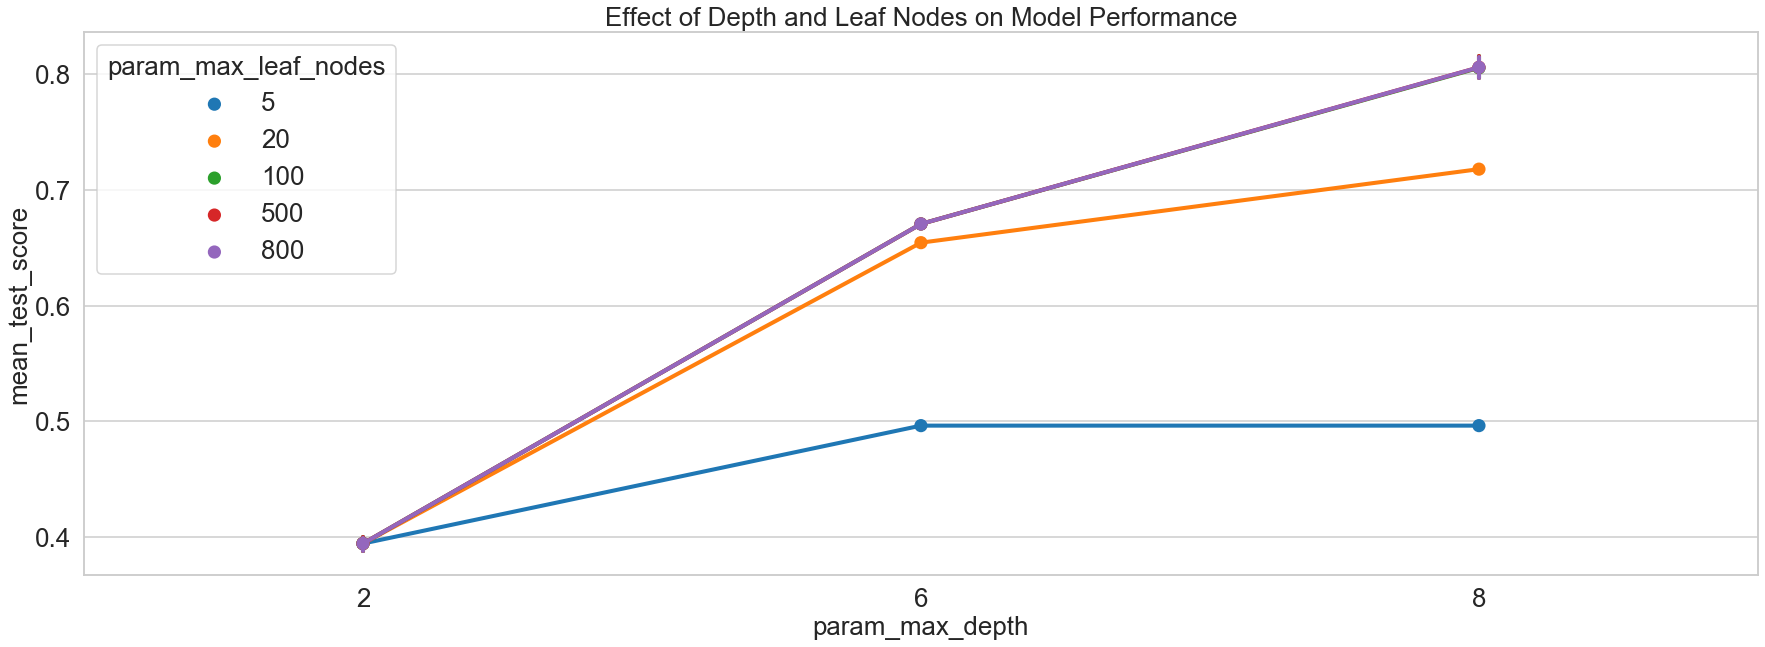

In [27]:
# Plotting to show the relationship of the mean test scores and max-depth parameters 
#      for different max-leaf-nodes parameters
fig,ax = plt.subplots()
sn.pointplot(data=df,
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

# 4) Work with Resulting Model

## 4.1) Recall the final model

In [28]:
best_model = DecisionTreeRegressor(criterion='mse',
                                max_depth=8,
                                max_leaf_nodes=500,
                                min_samples_leaf=20,
                                min_samples_split=10)
best_model.fit(X,y)
print(best_model.score(X,y))

0.8542587156355247


## 4.2) Get the 

In [29]:
y_pred = best_model.predict(X_test)

y_pred

array([363.73809524, 113.35294118,  14.48148148, ..., 122.28282828,
       422.        ,  88.4516129 ])

In [31]:
y_test - y_pred


12830     61.261905
8688     -25.352941
7091     -10.481481
12230      9.590909
431        1.525000
            ...    
6260     -75.610169
16788   -165.285714
819       38.717172
15323    212.000000
7590      27.548387
Name: total_count, Length: 5736, dtype: float64

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')


AttributeError: 'Series' object has no attribute 'flatten'